Siderophile Elements - Mn, Fe, Co, Ni, Mo, Ru, Rh, Pd, Re, Os, Ir, Pt, Au

Here we are trying to find some pattern based on the model performance before and after removal of Fe-S-C points in different systems.

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
%matplotlib inline
plt.style.use('seaborn-white')

**COBALT**

Here for cobalt we will first fit the model with Fe-S-C data, then again fit the same data with degree 2, then repeat this process after removing the Fe-S-C points.

In [12]:
data2 = pd.ExcelFile('ModifiedData/N4-siderophiles/Co.xlsx')
print(data2.sheet_names)
df3 = data2.parse('Legends')
df3.head(5)

df4 = df3.drop(['Reference', 'Run #', 'D(Co)'], axis=1)
df4.dropna()
df4['squaredLnFeDomains'] = np.square(df4['LnFeDomains'])
pd.options.display.max_rows = 999
df4.info()

df4.head(69)

['Sheet1', 'Legends', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet6']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
Dinv                  67 non-null float64
LnFeDomains           67 non-null float64
LnDinv                67 non-null float64
X                     67 non-null int64
squaredLnFeDomains    67 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.7 KB


,Dinv,LnFeDomains,LnDinv,X,squaredLnFeDomains
0,0.793651,-0.063935,-0.231112,1,0.004088
1,0.632911,-0.171537,-0.457425,1,0.029425
2,0.500000,-0.297457,-0.693147,1,0.088481
3,0.500000,-0.565593,-0.693147,1,0.319895
4,0.270270,-0.818951,-1.308333,1,0.670681
5,0.256410,-0.977994,-1.360977,1,0.956473
6,0.181818,-1.540667,-1.704748,1,2.373654
7,0.215983,-1.522616,-1.532557,1,2.318359
8,0.294118,-1.208104,-1.223775,1,1.459516
9,0.281690,-0.943130,-1.266948,1,0.889494


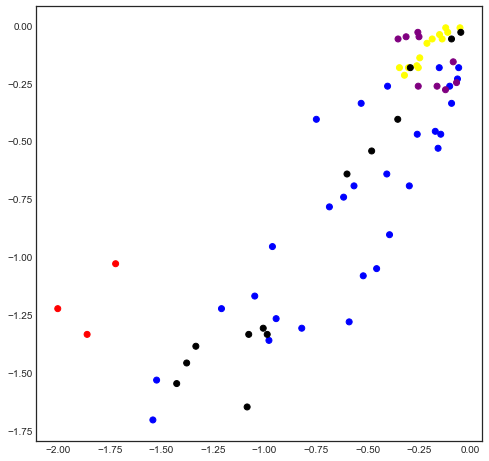

In [4]:
label = df4['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df4['LnFeDomains'], df4['LnDinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

The Fe-S-C points lie a bit away from the rest of the points, which should not be the case for the siderophile elements.

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


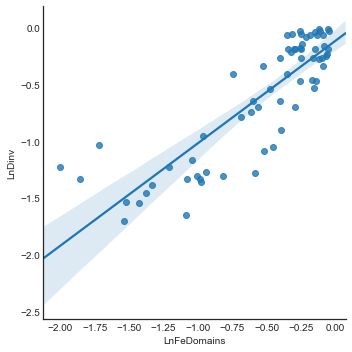

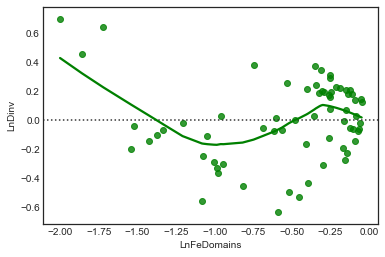

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.99e-20
Time:                        16:44:40   Log-Likelihood:                -7.8342
No. Observations:                  67   AIC:                             19.67
Df Residuals:                      65   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1120      0.050     -2.229      0.029      -0.212      -0.012
LnFeDomains     0.9048      0.068     13.323      0.000       0.769       1.040
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.034
Skew:                          -0.055   Prob(JB):                        0.983
Kurtosis:                       3.004   Cond. No.                         2.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df4)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 1,data=df4, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df4).fit()
est.summary()

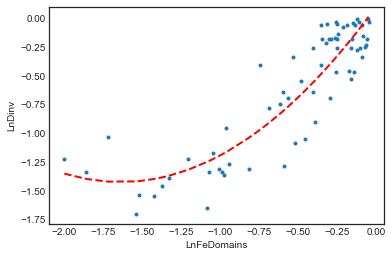

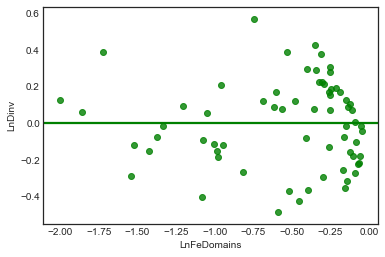

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           1.60e-23
Time:                        16:54:16   Log-Likelihood:                 3.0084
No. Observations:                  67   AIC:                          -0.01690
Df Residuals:                      64   BIC:                             6.597
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1003      0.061      1.650      0.104      -0.021       0.222
squaredLnFeDomains     0.5654      0.114      4.946      0.000       0.337       0.794
LnFeDomains            1.8565      0.201      9.234      0.000       1.455       2.258
==============================================================================
Omnibus:                        1.241   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.030
Skew:                           0.034   Prob(JB):                        0.597
Kurtosis:                       2.396   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Going for degree 2

fit = np.polyfit(df4['LnFeDomains'],df4['LnDinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df4['LnFeDomains'],df4['LnDinv'], '.', np.sort(df4['LnFeDomains']), fit_fn(np.sort(df4['LnFeDomains'])), '--r', linewidth=2)
plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 2,data=df4, color='green')
plt.show()

est = smf.ols('LnDinv ~ squaredLnFeDomains + LnFeDomains', df4).fit()
est.summary()

The fit improved significantly, but we have an insignificant p-value.

------------------------------

Now here we removed the Fe-S-C points from the table.

In [6]:
data3 = pd.ExcelFile('ModifiedData/N4-siderophiles/Co-Del.xlsx')
df5 = data3.parse('Legends')
df5.head(5)

df6 = df5.drop(['Reference', 'Run #', 'D(Co)'], axis=1)
df6.dropna()
pd.options.display.max_rows = 999
df6.info()

df6.head(69)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
Dinv           64 non-null float64
LnFeDomains    64 non-null float64
LnDinv         64 non-null float64
X              64 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


,Dinv,LnFeDomains,LnDinv,X
0,0.793651,-0.063935,-0.231112,1
1,0.632911,-0.171537,-0.457425,1
2,0.500000,-0.297457,-0.693147,1
3,0.500000,-0.565593,-0.693147,1
4,0.270270,-0.818951,-1.308333,1
5,0.256410,-0.977994,-1.360977,1
6,0.181818,-1.540667,-1.704748,1
7,0.215983,-1.522616,-1.532557,1
8,0.294118,-1.208104,-1.223775,1
9,0.281690,-0.943130,-1.266948,1


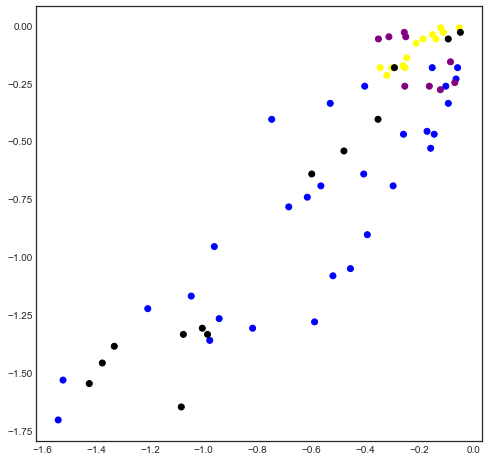

In [7]:
label = df6['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df6['LnFeDomains'], df6['LnDinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


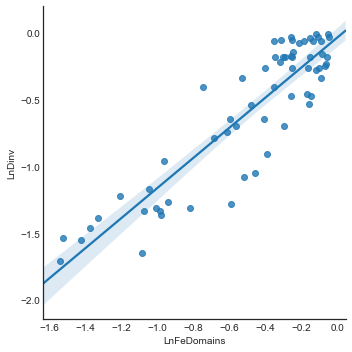

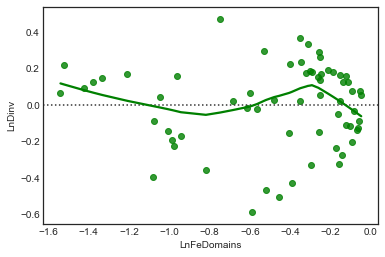

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     270.1
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.84e-24
Time:                        16:43:15   Log-Likelihood:                 4.6477
No. Observations:                  64   AIC:                            -5.295
Df Residuals:                      62   BIC:                           -0.9777
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0311      0.044     -0.708      0.482      -0.119       0.057
LnFeDomains     1.1287      0.069     16.434      0.000       0.991       1.266
==============================================================================
Omnibus:                        3.422   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.246
Skew:                          -0.543   Prob(JB):                        0.197
Kurtosis:                       2.809   Cond. No.                         3.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df6)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 1,data=df6, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df6).fit()
est.summary()

Now after removal of the points, the model is even more unstable, with a p-value close to (0.5). This is difficult to understand, this may be due to fewer points on one side of the plot.

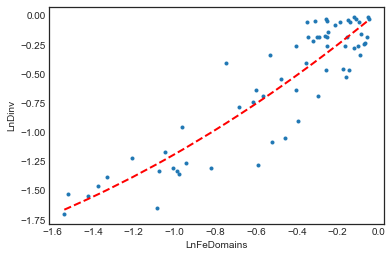

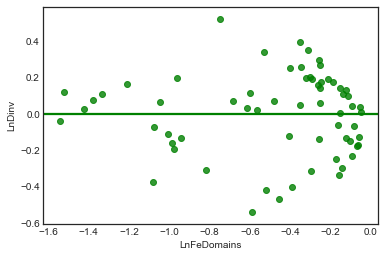

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.73e-23
Time:                        17:00:12   Log-Likelihood:                 5.4567
No. Observations:                  64   AIC:                            -4.913
Df Residuals:                      61   BIC:                             1.563
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0297      0.065      0.454      0.652      -0.101       0.161
np.square(LnFeDomains)     0.2208      0.177      1.250      0.216      -0.133       0.574
LnFeDomains                1.4396      0.258      5.579      0.000       0.924       1.956
==============================================================================
Omnibus:                        1.233   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.260
Skew:                          -0.308   Prob(JB):                        0.533
Kurtosis:                       2.696   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Going for degree 2

fit = np.polyfit(df6['LnFeDomains'],df6['LnDinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df6['LnFeDomains'],df6['LnDinv'], '.', np.sort(df6['LnFeDomains']), fit_fn(np.sort(df6['LnFeDomains'])), '--r', linewidth=2)
plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 2,data=df6, color='green')
plt.show()

est = smf.ols('LnDinv ~ np.square(LnFeDomains) + LnFeDomains', df6).fit()
est.summary()

Again we see that the fit of the curve significantly, improved on increasing the order of the equation, but again we have a very high p-value.

**This is a general trend, all the higher order models are very easily effected by the high levarege points, hence giving a very high p-value.**~~~P1

Need to check for more siderophile elements.

-------------------------------------------------------------

## Molybdenum

In [22]:
data12 = pd.ExcelFile('ModifiedData/N4-siderophiles/Mo.xlsx')
print(data12.sheet_names)
df13 = data12.parse('Sheet1')
df13.head(5)

df14 = df13.drop(['Reference', 'Run #'], axis=1)
df14.dropna()
pd.options.display.max_rows = 999
df14.info()

df14.head(5)

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
D(Mo)          46 non-null float64
Dinv           46 non-null float64
LnFeDomains    46 non-null float64
LnDinv         46 non-null float64
X              46 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.9 KB


,D(Mo),Dinv,LnFeDomains,LnDinv,X
0,0.80,1.250000,-0.063935,0.223144,1
1,0.86,1.162791,-0.171537,0.150823,1
2,1.23,0.813008,-0.297457,-0.207014,1
3,1.20,0.833333,-0.565593,-0.182322,1
4,3.10,0.322581,-0.818951,-1.131402,1


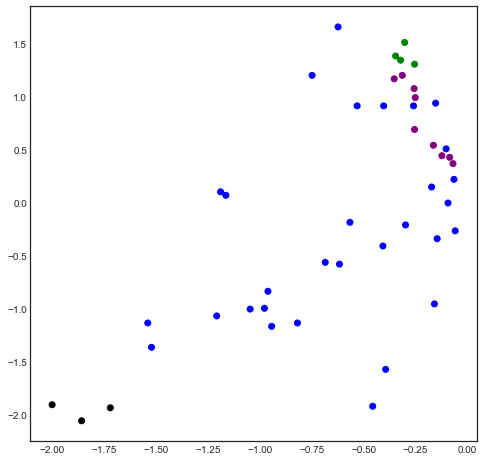

In [23]:
label = df14['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df14['LnFeDomains'], df14['LnDinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


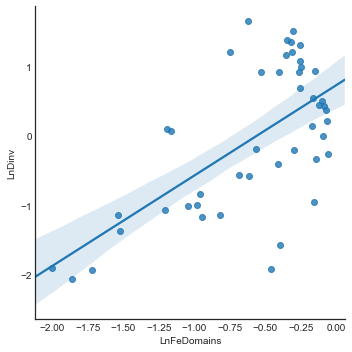

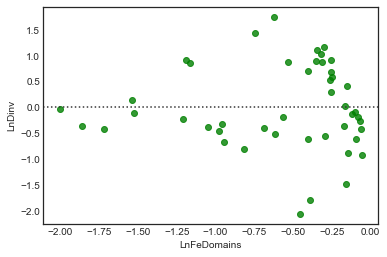

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           1.98e-06
Time:                        17:07:06   Log-Likelihood:                -55.783
No. Observations:                  46   AIC:                             115.6
Df Residuals:                      44   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7306      0.185      3.939      0.000       0.357       1.104
LnFeDomains     1.2991      0.237      5.475      0.000       0.821       1.777
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.182
Skew:                          -0.140   Prob(JB):                        0.913
Kurtosis:                       2.872   Cond. No.                         2.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df14)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', order = 1,data=df14, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df14).fit()
est.summary()

very poor fit, r-squared statistic ~ 0.4

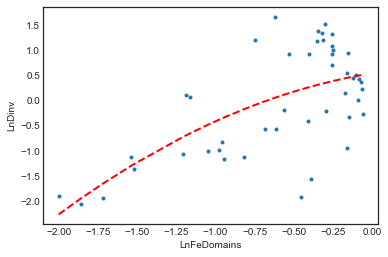

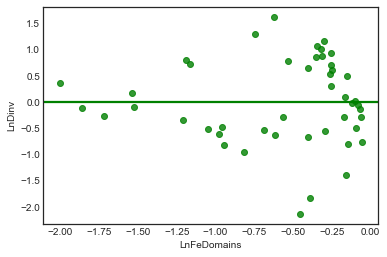

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     15.46
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           8.73e-06
Time:                        17:07:20   Log-Likelihood:                -55.270
No. Observations:                  46   AIC:                             116.5
Df Residuals:                      43   BIC:                             122.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5401      0.268      2.015      0.050      -0.000       1.081
np.square(LnFeDomains)    -0.4446      0.451     -0.985      0.330      -1.355       0.466
LnFeDomains                0.5108      0.835      0.612      0.544      -1.173       2.194
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.809
Skew:                          -0.323   Prob(JB):                        0.667
Kurtosis:                       2.922   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Going for degree 2

fit = np.polyfit(df14['LnFeDomains'],df14['LnDinv'], 2)
fit_fn = np.poly1d(fit)

plt.plot(df14['LnFeDomains'],df14['LnDinv'], '.', np.sort(df14['LnFeDomains']), fit_fn(np.sort(df14['LnFeDomains'])), '--r', linewidth=2)
plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

sns.residplot(x='LnFeDomains', y='LnDinv', lowess=True, order = 2,data=df14, color='green')
plt.show()

est = smf.ols('LnDinv ~ np.square(LnFeDomains) + LnFeDomains', df14).fit()
est.summary()

Rsquared statistics did not improve but the p-value improved fairly enough to reject the model.

This also acts as a verification  of p1 property.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
Dinv           43 non-null float64
LnFeDomains    43 non-null float64
LnDinv         43 non-null float64
X              43 non-null int64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


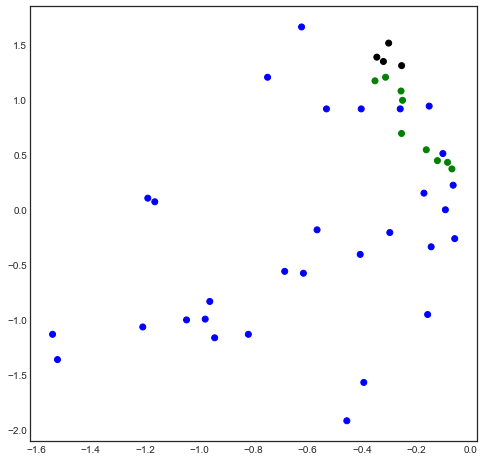

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


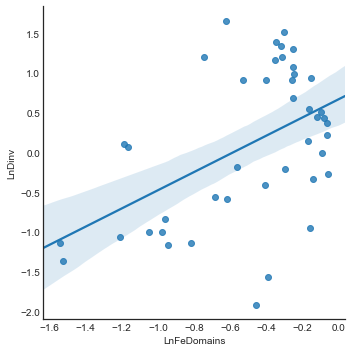

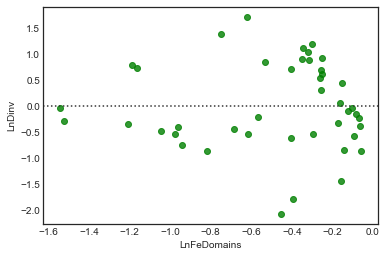

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     12.66
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           0.000959
Time:                        17:08:44   Log-Likelihood:                -53.241
No. Observations:                  43   AIC:                             110.5
Df Residuals:                      41   BIC:                             114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6741      0.207      3.263      0.002       0.257       1.091
LnFeDomains     1.1467      0.322      3.559      0.001       0.496       1.797
==============================================================================
Omnibus:                        0.314   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.406
Skew:                          -0.185   Prob(JB):                        0.816
Kurtosis:                       2.700   Cond. No.                         3.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Now here we removed the Fe-S-C points from the table.

data13 = pd.ExcelFile('ModifiedData/N4-siderophiles/Mo-Del.xlsx')
df15 = data13.parse('Sheet1')
df15.head(5)

df16 = df15.drop(['Reference', 'Run #', 'D(Mo)'], axis=1)
df16.dropna()
pd.options.display.max_rows = 999
df16.info()

df16.head(5)

label = df16['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df16['LnFeDomains'], df16['LnDinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

sns.lmplot(x='LnFeDomains', y='LnDinv', data=df16)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', order = 1,data=df16, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df16).fit()
est.summary()

Worst fit obtained so far, no specific reason for this poor fit.

Os, Pt, Au, Re, Ru ---  seems to provide similar fit as Mo

Rh, Mn --- fewer data points.

----------------

## Iridium

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
D(Ir)          68 non-null float64
Dinv           68 non-null float64
LnFeDomains    68 non-null float64
LnDinv         65 non-null float64
X              68 non-null int64
dtypes: float64(4), int64(1)
memory usage: 2.7 KB


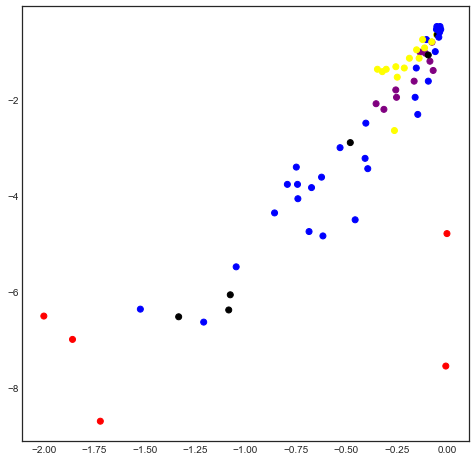

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


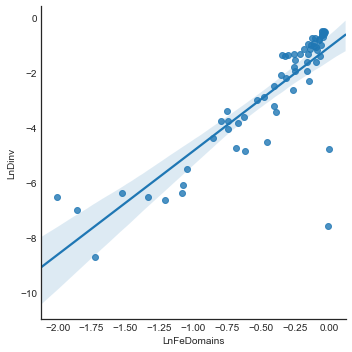

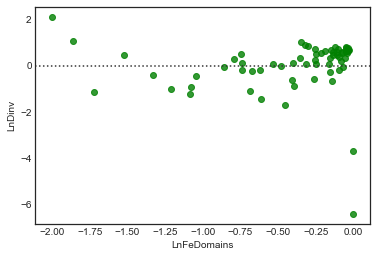

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     150.8
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.28e-18
Time:                        06:24:41   Log-Likelihood:                -101.69
No. Observations:                  65   AIC:                             207.4
Df Residuals:                      63   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0826      0.196     -5.533      0.000      -1.474      -0.692
LnFeDomains     3.7616      0.306     12.280      0.000       3.149       4.374
==============================================================================
Omnibus:                       71.429   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.659
Skew:                          -3.134   Prob(JB):                    5.08e-137
Kurtosis:                      16.873   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
data22 = pd.ExcelFile('ModifiedData/N4-siderophiles/Ir.xlsx')
print(data22.sheet_names)
df23 = data22.parse('Sheet1')
df23.head(5)

df24 = df23.drop(['Reference', 'Run #'], axis=1)
df24.dropna()
pd.options.display.max_rows = 999
df24.info()

df24.head(5)

label = df24['X']
colors = ['blue','purple','yellow','green','red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(df24['LnFeDomains'], df24['LnDinv'], c=label,cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

sns.lmplot(x='LnFeDomains', y='LnDinv', data=df24)
plt.show()
sns.residplot(x='LnFeDomains', y='LnDinv', order = 1,data=df24, color='green')
plt.show()
est = smf.ols('LnDinv ~ LnFeDomains', df24).fit()
est.summary()

Iridium also provides the same plot for Fe-S-C points. So our assumption that Fe/Ni ratio has no impact on Siderophile elements seems to be incorrect.